# SVM Regressor using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm SVM as a Regression algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis.

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset,position):
    dataset.iloc[:,position:] = dataset.iloc[:,position:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset,4)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Initialize Test Set (Home | BLE)

In [5]:
test_dataset_ble  = load_file('../radiomap_home_BluetoothWiFi.csv')
test_dataset_ble  = replace_features_nan(test_dataset_ble,3)
display(test_dataset_ble)
display(test_dataset_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69.0,-68.0,-69.0,-72.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70.0,-66.0,-66.0,-70.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-88.0,-87.0,-76.0
2,526,-2.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,527,-2.0,0.5,-65.0,-66.0,-66.0,-70.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66.0,-66.0,-66.0,-71.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65.0,-68.0,-68.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-76.0,NaN,-87.0,-76.0,NaN
126,650,-2.0,-1.5,-66.0,-67.0,-64.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-88.0,-80.0,NaN
127,651,-2.0,-1.5,-65.0,-68.0,-66.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-96.0,-76.0,NaN
128,652,-2.0,-1.5,-65.0,-68.0,-66.0,NaN,-72.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-86.0,-76.0,NaN


(130, 18)

In [6]:
test_dataset_home_ble = load_file('../radiomap_home_Bluetooth.csv')
test_dataset_home_ble = replace_features_nan(test_dataset_home_ble,3)
display(test_dataset_home_ble)
display(test_dataset_home_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,NaN
1,391,-2.0,0.5,-84,-80,NaN
2,392,-2.0,0.5,-84,-85,NaN
3,393,-2.0,0.5,-84,-84,NaN
4,394,-2.0,0.5,-90,-81,NaN
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,NaN
126,517,-2.0,-1.5,-81,-90,NaN
127,518,-2.0,-1.5,-80,-88,NaN
128,519,-2.0,-1.5,-81,-87,NaN


(130, 6)

### Dataset Overall Info

In [7]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [8]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [9]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    total_amount = dataset.count() + dataset.isnull().sum()
    total_pd = pd.DataFrame(total_amount,columns=['Samples'])
    missing_percentage = (dataset.isnull().sum() / (dataset.count() + dataset.isnull().sum()))
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(total_pd).join(missing_percentage_dataset)
    display(missing_dataset)
    return missing_dataset

In [10]:
missing_dataset = compute_missing_values(dataset)

,Missing Values,Samples,% of Missing Values
Fingerprint ID,0,750,0.000000
coordinate_X,0,750,0.000000
coordinate_Y,0,750,0.000000
zone,0,750,0.000000
f0:5c:19:94:1a:40,120,750,0.160000
f0:5c:19:94:1a:41,116,750,0.154667
f0:5c:19:94:1a:42,115,750,0.153333
34:fc:b9:18:e4:c1,561,750,0.748000
34:fc:b9:18:e4:c0,605,750,0.806667
34:fc:b9:18:e4:c2,572,750,0.762667


### Overall Histogram of dataset atributes

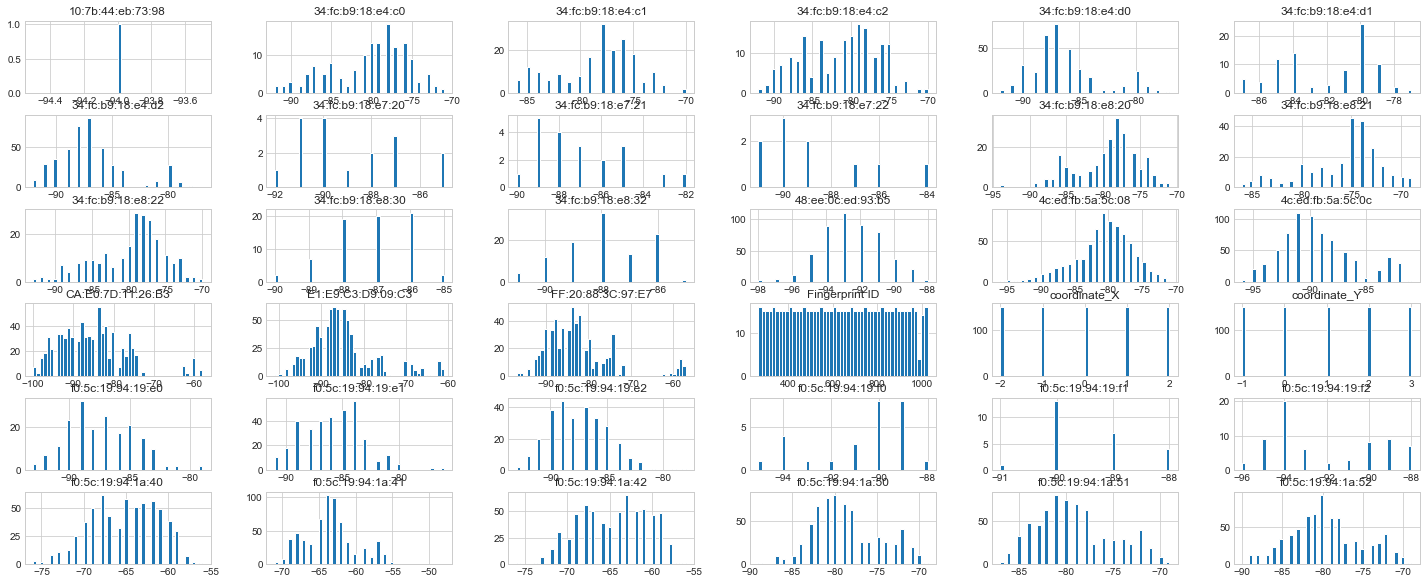

In [11]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Reference Points
Graphical display of the reference points scanned in the experiment

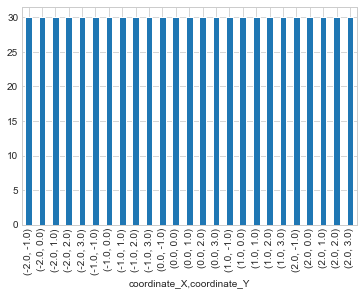

In [12]:
reference_points = dataset.groupby(['coordinate_X','coordinate_Y'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,-80.0,-80.0,-80.0,-89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,-80.0,-81.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-63.0,-62.0,-62.0,NaN,NaN,NaN,-80.0,-79.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.0,-61.0,-63.0,NaN,NaN,NaN,-81.0,-81.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,-80.0,-80.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0
746,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-74.0,-73.0,-83.0,...,-86.0,NaN,NaN,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0
747,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0
748,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,-72.0,-73.0,-83.0,...,-85.0,NaN,NaN,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN


<BarContainer object of 30 artists>

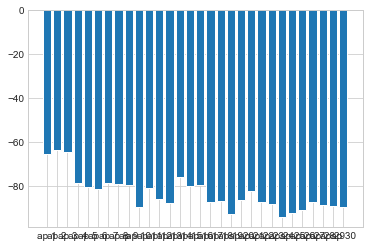

In [13]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.isupper() == True:
        first_beacon_index = list(dataset).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
display(dataset.iloc[:,4:first_beacon_index])
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


<BarContainer object of 3 artists>

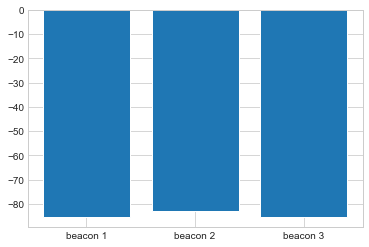

In [14]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,first_beacon_index:]
display(beacons)
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

### Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

#### Wifi Signal Strength

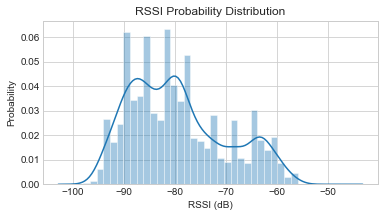

In [15]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
sns.distplot(dataset.iloc[:,4:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

#### Bluetooth Signal Strength

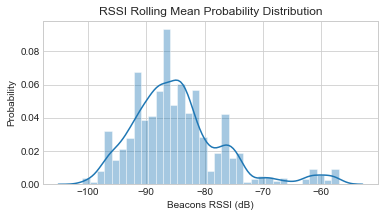

In [16]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [17]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [18]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers (Current approach is using the minimum global scanned value)

In [19]:
def compute_data_cleaning_with_local_minimum(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [20]:
def compute_data_cleaning_with_global_minimum(dataset,position,index):
    numpy_arr_wifi=dataset.iloc[:,position:index].to_numpy()
    numpy_arr_ble=dataset.iloc[:,index:].to_numpy()
    nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,index:] = dataset.iloc[:,index:].fillna(nan_filler_ble)
    dataset.iloc[:,position:index] = dataset.iloc[:,position:index].fillna(nan_filler_wifi)
    print("MINIMUM WIFI: "+ str(nan_filler_wifi))
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [21]:
def compute_data_cleaning_with_global_minimum_only_ble(dataset,position,index):
    numpy_arr_ble=dataset.iloc[:,index:].to_numpy()
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,index:] = dataset.iloc[:,index:].fillna(nan_filler_ble)
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [22]:
compute_data_cleaning_with_global_minimum(dataset,4,first_beacon_index)
display(dataset)

MINIMUM WIFI: -98.98
MINIMUM BLE: -102.01


,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


In [23]:
first_beacon_index_test_dataset  = -1
for ap in test_dataset_ble.iloc[:,3:]:
    if ap.isupper() == True:
        first_beacon_index_test_dataset = list(test_dataset_ble).index(ap)
        break
display(test_dataset_ble.iloc[:,first_beacon_index_test_dataset:])

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.0,-83.0
1,-88.0,-87.0,-76.0
2,NaN,NaN,NaN
3,-86.0,-87.0,-81.0
4,-92.0,-91.0,NaN
...,...,...,...
125,-87.0,-76.0,NaN
126,-88.0,-80.0,NaN
127,-96.0,-76.0,NaN
128,-86.0,-76.0,NaN


In [24]:
compute_data_cleaning_with_global_minimum(test_dataset_ble,3,first_beacon_index_test_dataset)
display(test_dataset_ble)

MINIMUM WIFI: -81.81
MINIMUM BLE: -101.0


,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69.00,-68.00,-69.00,-72.00,-73.00,-72.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70.00,-66.00,-66.00,-70.00,-73.00,-72.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-88.0,-87.0,-76.0
2,526,-2.0,0.5,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-101.0,-101.0,-101.0
3,527,-2.0,0.5,-65.00,-66.00,-66.00,-70.00,-81.81,-68.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66.00,-66.00,-66.00,-71.00,-81.81,-68.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-92.0,-91.0,-101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65.00,-68.00,-68.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-76.00,-81.81,-87.0,-76.0,-101.0
126,650,-2.0,-1.5,-66.00,-67.00,-64.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-88.0,-80.0,-101.0
127,651,-2.0,-1.5,-65.00,-68.00,-66.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-96.0,-76.0,-101.0
128,652,-2.0,-1.5,-65.00,-68.00,-66.00,-81.81,-72.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-86.0,-76.0,-101.0


In [25]:
first_beacon_index_test_dataset_v2  = -1
for ap in test_dataset_home_ble.iloc[:,3:]:
    if ap.isupper() == True:
        first_beacon_index_test_dataset_v2 = list(test_dataset_home_ble).index(ap)
        break
display(test_dataset_home_ble.iloc[:,first_beacon_index_test_dataset_v2:])

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,NaN
1,-84,-80,NaN
2,-84,-85,NaN
3,-84,-84,NaN
4,-90,-81,NaN
...,...,...,...
125,-80,-88,NaN
126,-81,-90,NaN
127,-80,-88,NaN
128,-81,-87,NaN


In [26]:
compute_data_cleaning_with_global_minimum_only_ble(test_dataset_home_ble,3,first_beacon_index_test_dataset_v2)
display(test_dataset_home_ble)

MINIMUM BLE: -95.95


,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,-95.95
1,391,-2.0,0.5,-84,-80,-95.95
2,392,-2.0,0.5,-84,-85,-95.95
3,393,-2.0,0.5,-84,-84,-95.95
4,394,-2.0,0.5,-90,-81,-95.95
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,-95.95
126,517,-2.0,-1.5,-81,-90,-95.95
127,518,-2.0,-1.5,-80,-88,-95.95
128,519,-2.0,-1.5,-81,-87,-95.95


### Initialize Training Data
Training Data intialization for predictions purposes

In [27]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-86.00,-98.98,-98.98,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-85.00,-98.98,-98.98,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98


(750, 30)

In [28]:
train_ble = dataset.iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


(750, 3)

In [29]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


(750, 33)

In [30]:
train_Y = dataset.iloc[:,1:3]
display(train_Y)
display(train_Y.shape)

,coordinate_X,coordinate_Y
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,3.0
4,1.0,3.0
...,...,...
745,2.0,3.0
746,2.0,3.0
747,2.0,3.0
748,2.0,3.0


(750, 2)

### Initialize Test Data

In [31]:
test_ble_X = test_dataset_ble.iloc[:,first_beacon_index_test_dataset:]
display(test_ble_X)
display(test_ble_X.shape)
test_ble_Y = test_dataset_ble.iloc[:,1:3]
display(test_ble_Y)
display(test_ble_Y.shape)

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.0,-83.0
1,-88.0,-87.0,-76.0
2,-101.0,-101.0,-101.0
3,-86.0,-87.0,-81.0
4,-92.0,-91.0,-101.0
...,...,...,...
125,-87.0,-76.0,-101.0
126,-88.0,-80.0,-101.0
127,-96.0,-76.0,-101.0
128,-86.0,-76.0,-101.0


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

In [32]:
test_ble_home_X = test_dataset_home_ble.iloc[:,first_beacon_index_test_dataset_v2:]
display(test_ble_home_X)
display(test_ble_home_X.shape)
test_ble_home_Y = test_dataset_home_ble.iloc[:,1:3]
display(test_ble_home_Y)
display(test_ble_home_Y.shape)

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,-95.95
1,-84,-80,-95.95
2,-84,-85,-95.95
3,-84,-84,-95.95
4,-90,-81,-95.95
...,...,...,...
125,-80,-88,-95.95
126,-81,-90,-95.95
127,-80,-88,-95.95
128,-81,-87,-95.95


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [33]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [34]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [35]:
default_groups = dataset["coordinate_X"].map(str)+","+dataset["coordinate_Y"].map(str)
#SVM Configurable Arrays
scaler = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
C_parameter_list = [0.25,0.5,1.0,10.0,100.0,1000.0] 
kernel_list = ("linear","poly","rbf","sigmoid")
gamma_list = [10,100,"scale","auto"]
epsilon_list = [0.1,0.2,0.3]
svc_basic = SVR()
print("DEFAULT HYPERPARAMETERS")
default_params = svc_basic.get_params()
display(pd.DataFrame(default_params,index=[1]))

DEFAULT HYPERPARAMETERS


,C,cache_size,coef0,degree,epsilon,gamma,kernel,max_iter,shrinking,tol,verbose
1,1.0,200,0.0,3,0.1,scale,rbf,-1,True,0.001,False


### Statistics Output Format
Structure of the statistical output of each call to the SVM Classification Function

In [36]:
def structure_data(data,rsquared):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    std = data['error'].std()
    q25 = data['error'].quantile(q=0.25)
    q50= data['error'].quantile(q=0.5)
    q75 =data['error'].quantile(q=0.7)
    q95= data['error'].quantile(q=0.95)
    r_squared = rsquared
    minValue= data['error'].min()
    maxValue = data['error'].max()
    statistical_results = [mae,mse,rsme,std,q25,q50,q75,q95,minValue,maxValue,r_squared]
    return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([2.52350266e-02, 1.69126638e-02, 2.73055953e-02, 8.83643969e-04,
       4.20123362e-04, 7.41393916e-04, 5.32947668e-02, 2.88721299e-02,
       3.25123453e-02, 5.69037142e-02, 2.36287972e-02, 9.68693396e-03,
       7.82966582e-03, 1.34274451e-03, 1.27156267e-03, 2.07870679e-03,
       1.22591775e-03, 1.26106434e-02, 2.02403549e-02, 1.56875223e-02,
       2.06295324e-03, 2.27459300e-03, 6.39305433e-03, 0.00000000e+00,
       3.95396368e-03, 4.19341460e-05, 2.44333507e-04, 4.45666832e-05,
       1.22706862e-05, 3.30433500e-06, 1.82051064e-01, 1.47746406e-01,
       3.16487304e-01])

CA:E0:7D:11:26:B3    0.316487
E1:E9:C3:D9:09:C3    0.182051
FF:20:88:3C:97:E7    0.147746
4c:ed:fb:5a:5c:0c    0.056904
f0:5c:19:94:1a:50    0.053295
f0:5c:19:94:1a:52    0.032512
f0:5c:19:94:1a:51    0.028872
f0:5c:19:94:1a:42    0.027306
f0:5c:19:94:1a:40    0.025235
4c:ed:fb:5a:5c:08    0.023629
48:ee:0c:ed:93:b5    0.020240
f0:5c:19:94:1a:41    0.016913
34:fc:b9:18:e4:d0    0.015688
34:fc:b9:18:e4:d2    0.012611
f0:5c:19:94:19:e1    0.009687
f0:5c:19:94:19:e2    0.007830
34:fc:b9:18:e8:32    0.006393
f0:5c:19:94:19:f2    0.003954
34:fc:b9:18:e8:30    0.002275
34:fc:b9:18:e8:20    0.002079
34:fc:b9:18:e4:d1    0.002063
34:fc:b9:18:e8:21    0.001343
34:fc:b9:18:e8:22    0.001272
f0:5c:19:94:19:e0    0.001226
34:fc:b9:18:e4:c1    0.000884
34:fc:b9:18:e4:c2    0.000741
34:fc:b9:18:e4:c0    0.000420
34:fc:b9:18:e7:21    0.000244
34:fc:b9:18:e7:22    0.000045
f0:5c:19:94:19:f0    0.000042
34:fc:b9:18:e7:20    0.000012
f0:5c:19:94:19:f1    0.000003
10:7b:44:eb:73:98    0.000000
dtype: flo

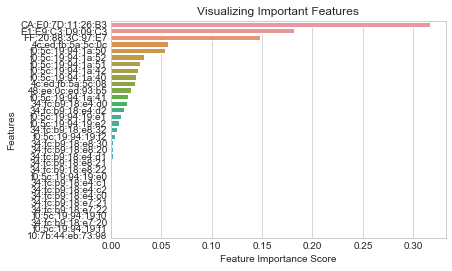

In [37]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestRegressor()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y)
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - SVM Regression Model

In [38]:
def compute_SVR(flag=0,trainX_data = None, trainY_data = None,testX_data = None,testY_data = None, scaler = None,
                            cross_validation = None,C_parameter = 1.0, kernel_parameter='rbf', gamma_parameter="scale",
                epsilon_value =0.1):
    # Init the SVM Regressor Estimator with the hyperparameters
    svr_estimator = SVR(C=C_parameter,kernel=kernel_parameter,gamma=gamma_parameter,epsilon=epsilon_value)
    # Since SVM is not by nature provide multi-value output, we have to use a MultiOutputRegressor so we can predict both x and y 
    wrapper = MultiOutputRegressor(svr_estimator)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,wrapper)
    else:
        # Use SKLear MultiOutputRegressor as a default estimator
        main_estimator = wrapper
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        # Compute Regression performance metrics
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    else:
        # Fit and Predict the results of the testing data features using cross-validation
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation,groups=default_groups)
        # Compute Regression performance metrics
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = testY_data.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    return structure_data(result,coefficient_determination)

### Experiments

#### Check Training model with no cross validation
Use SVM Regressor to check the results on the training data alone

In [39]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_SVR(trainX_data=trainX_data,trainY_data=train_Y,
                                   testX_data=trainX_data,testY_data=train_Y,
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
2,0.450671,0.382997,0.618868,0.424421,0.141229,0.279380,0.533142,1.375066,0.00552,2.201841,0.904251,Both
0,0.727878,1.142853,1.069043,0.783495,0.141557,0.401793,0.899525,2.502546,0.00396,4.043140,0.714287,WiFi
1,0.864264,1.206073,1.098214,0.678037,0.268666,0.755410,1.112926,2.184876,0.01181,3.031870,0.698482,BLE


#### Experiment - SVM with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

In [40]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        skf = StratifiedKFold(n_splits=cv)
        splited = skf.split(trainX_data,default_groups)
        result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_fold = statistics.sort_values(by=['mae'])['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,folds,type
26,0.667526,0.750917,0.866555,0.552932,0.242937,0.506366,0.860039,1.825079,0.002981,3.367048,0.812271,10,Both
25,0.668380,0.752902,0.867699,0.553696,0.246130,0.498320,0.865310,1.818119,0.003863,3.260813,0.811775,9,Both
24,0.670053,0.751583,0.866939,0.550469,0.260958,0.499248,0.854227,1.799462,0.007191,3.176436,0.812104,8,Both
23,0.681535,0.779024,0.882623,0.561208,0.263157,0.514741,0.850681,1.814459,0.014005,3.394305,0.805244,7,Both
21,0.686257,0.791493,0.889659,0.566544,0.261822,0.518899,0.870502,1.801519,0.005933,3.288703,0.802127,5,Both
22,0.692134,0.795211,0.891746,0.562658,0.266466,0.536820,0.878224,1.844490,0.006048,3.307666,0.801197,6,Both
20,0.712249,0.843392,0.918364,0.580122,0.265367,0.560478,0.898115,1.849177,0.008149,3.316419,0.789152,4,Both
19,0.741414,0.908482,0.953143,0.599389,0.285876,0.570091,0.936169,1.952273,0.004788,3.317359,0.772879,3,Both
18,0.786107,0.996763,0.998380,0.615877,0.299256,0.620918,1.021138,2.015246,0.009113,3.278968,0.750809,2,Both
16,0.912945,1.304456,1.142128,0.686743,0.301872,0.792690,1.189527,2.215068,0.006852,3.129274,0.673886,9,BLE


Number of Folds:  10


#### Experiment - SVM with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

In [41]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = size, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,test_size,type
19,0.622907,0.618826,0.786655,0.482039,0.237720,0.469917,0.866039,1.514665,0.009368,2.040610,0.845294,0.2,Both
20,0.650533,0.672599,0.820122,0.500519,0.234245,0.532517,0.840533,1.661000,0.006836,2.250219,0.831850,0.3,Both
18,0.672409,0.712305,0.843982,0.513506,0.264734,0.488569,0.953486,1.475098,0.019925,2.009738,0.821924,0.1,Both
21,0.695674,0.754875,0.868836,0.521363,0.268580,0.557771,0.883951,1.715284,0.018452,2.334751,0.811281,0.4,Both
22,0.747882,0.874197,0.934985,0.561881,0.303459,0.612233,0.962900,1.815513,0.005215,2.550629,0.781451,0.5,Both
23,0.790205,0.946036,0.972644,0.567741,0.335837,0.656468,1.018420,1.907112,0.023488,2.535276,0.763491,0.6,Both
24,0.846791,1.067829,1.033358,0.592826,0.367747,0.724659,1.082110,2.036070,0.002867,2.647317,0.733043,0.7,Both
1,0.878126,1.397699,1.182243,0.794228,0.249672,0.656642,1.170989,2.650138,0.030742,3.323888,0.650575,0.2,WiFi
2,0.897208,1.432499,1.196870,0.793926,0.258460,0.621562,1.182911,2.544294,0.021960,3.385591,0.641875,0.3,WiFi
9,0.907798,1.296288,1.138547,0.691788,0.346670,0.774749,1.314272,2.188260,0.056188,2.491042,0.675928,0.1,BLE


#### Experiment - SVM with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [42]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups)
    result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
1,1.413501,2.450597,1.565438,0.673213,0.925843,1.367475,1.742569,2.639996,0.041724,3.423553,0.387351,BLE
2,1.876748,4.170745,2.042240,0.805871,1.271532,1.989445,2.414271,2.954258,0.075077,3.592997,-0.042686,Both
0,2.225301,5.803159,2.408975,0.923217,1.658183,2.271969,2.723088,3.664347,0.060773,4.680157,-0.450790,WiFi


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using SVM

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,method,type
7,0.650533,0.672599,0.820122,0.500519,0.234245,0.532517,0.840533,1.661000,0.006836,2.250219,0.831850,HoldOut,Both
8,0.667526,0.750917,0.866555,0.552932,0.242937,0.506366,0.860039,1.825079,0.002981,3.367048,0.812271,Stratified K-Fold,Both
1,0.897208,1.432499,1.196870,0.793926,0.258460,0.621562,1.182911,2.544294,0.021960,3.385591,0.641875,HoldOut,WiFi
5,0.913795,1.302809,1.141406,0.684406,0.319560,0.801165,1.177619,2.206144,0.009923,3.149922,0.674298,Stratified K-Fold,BLE
2,0.926837,1.586832,1.259695,0.853684,0.241182,0.648243,1.208152,2.801987,0.003887,4.219174,0.603292,Stratified K-Fold,WiFi
4,0.935070,1.358307,1.165464,0.697217,0.319945,0.818104,1.282963,2.218990,0.022427,2.836355,0.660423,HoldOut,BLE
3,1.413501,2.450597,1.565438,0.673213,0.925843,1.367475,1.742569,2.639996,0.041724,3.423553,0.387351,LOO,BLE
6,1.876748,4.170745,2.042240,0.805871,1.271532,1.989445,2.414271,2.954258,0.075077,3.592997,-0.042686,LOO,Both
0,2.225301,5.803159,2.408975,0.923217,1.658183,2.271969,2.723088,3.664347,0.060773,4.680157,-0.450790,LOO,WiFi


Selected cross validation method:  LOO


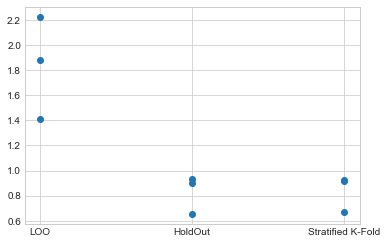

In [43]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
    X_train_split = X_train_split.reset_index(drop=True)
    X_test_split = X_test_split.reset_index(drop=True)
    y_train_split = y_train_split.reset_index(drop=True)
    y_test_split = y_test_split.reset_index(drop=True)
    holdout = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups)
    loo = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skf = StratifiedKFold(n_splits=selected_fold)
    splited = skf.split(trainX_data,default_groups)
    skfold = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['method'],statistics['mae'],'o')
selected_method = 'LOO'
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

In [44]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_preprocessing = statistics.sort_values(by=['mae'])['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['mae'])['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,preprocessing,preprocessingFunc,type
7,1.376520,2.340918,1.530006,0.668362,0.902564,1.313516,1.703400,2.703174,0.058608,3.400084,0.414770,None,None,BLE
6,1.376759,2.343605,1.530884,0.669880,0.897758,1.312896,1.702671,2.713067,0.071065,3.396665,0.414099,MaxAbsScaler,MaxAbsScaler(copy=True),BLE
4,1.413501,2.450597,1.565438,0.673213,0.925843,1.367475,1.742569,2.639996,0.041724,3.423553,0.387351,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",BLE
5,1.413575,2.506864,1.583308,0.713687,0.905781,1.329219,1.731815,2.878352,0.032030,3.412013,0.373284,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",BLE
11,1.723036,3.553107,1.884969,0.764876,1.206721,1.702667,2.106819,3.030842,0.048179,4.259996,0.111723,None,None,Both
10,1.724554,3.556966,1.885992,0.763976,1.208188,1.706322,2.110983,3.022809,0.053985,4.252895,0.110758,MaxAbsScaler,MaxAbsScaler(copy=True),Both
9,1.827723,3.891813,1.972768,0.742951,1.278335,1.886605,2.316130,2.889952,0.056401,3.552112,0.027047,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
8,1.876748,4.170745,2.042240,0.805871,1.271532,1.989445,2.414271,2.954258,0.075077,3.592997,-0.042686,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
1,2.207595,5.705627,2.388645,0.912832,1.624543,2.171013,2.764196,3.674861,0.081487,4.794250,-0.426407,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",WiFi
0,2.225301,5.803159,2.408975,0.923217,1.658183,2.271969,2.723088,3.664347,0.060773,4.680157,-0.450790,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",WiFi


Selected Preprocessing:  None


#### Experiment - Running the SVR function with the different kernels

In [45]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','kernel','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for kernel in kernel_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                kernel_parameter=kernel)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                kernel_parameter=kernel)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,
                                                                                        stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),kernel_parameter=kernel)
        result.append(kernel)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_kernel = statistics.sort_values(by=['mae'])['kernel'].head(1).values[0]
print("Selected Kernel: ",selected_kernel)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,kernel,type
6,1.413501,2.450597,1.565438,0.673213,0.925843,1.367475,1.742569,2.639996,0.041724,3.423553,0.387351,rbf,BLE
4,1.445000,2.570722,1.603347,0.695228,0.942543,1.443034,1.813902,2.616422,0.025196,4.419197,0.357319,linear,BLE
8,1.730717,3.570581,1.889598,0.758925,1.162453,1.695429,2.129736,3.013112,0.032571,4.096413,0.107355,linear,Both
10,1.876748,4.170745,2.042240,0.805871,1.271532,1.989445,2.414271,2.954258,0.075077,3.592997,-0.042686,rbf,Both
9,2.039427,5.832467,2.415050,1.294388,1.350894,1.966088,2.319730,3.381340,0.066810,10.765281,-0.458117,poly,Both
2,2.225301,5.803159,2.408975,0.923217,1.658183,2.271969,2.723088,3.664347,0.060773,4.680157,-0.450790,rbf,WiFi
0,2.315997,6.352830,2.520482,0.995144,1.571084,2.222669,2.855164,3.894147,0.133904,6.683141,-0.588208,linear,WiFi
1,2.365551,7.367619,2.714336,1.331973,1.555915,2.311989,2.718787,3.979592,0.127332,12.157943,-0.841905,poly,WiFi
5,2.612082,19.334377,4.397087,3.539507,1.160310,1.688242,2.032667,11.660152,0.060842,22.946793,-3.833594,poly,BLE
11,3.053098,18.422567,4.292152,3.018826,1.238365,2.117311,3.042392,9.398696,0.094349,19.214087,-3.605642,sigmoid,Both


Selected Kernel:  rbf


#### Experiment - Running the SVR function with the different C parameters

In [46]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','C_parameter','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for C_param in C_parameter_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                 C_parameter=C_param)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                 C_parameter=C_param)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),C_parameter=C_param)
        result.append(C_param)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_c_parameter = statistics.sort_values(by=['mae'])['C_parameter'].head(1).values[0]
print("Selected C Parameter: ",selected_c_parameter)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,C_parameter,type
8,1.413501,2.450597,1.565438,0.673213,0.925843,1.367475,1.742569,2.639996,0.041724,3.423553,0.387351,1.00,BLE
7,1.413798,2.456171,1.567218,0.676726,0.944685,1.362579,1.745423,2.612506,0.073889,3.368966,0.385957,0.50,BLE
6,1.418061,2.474019,1.572901,0.680985,0.933185,1.363367,1.767779,2.626112,0.030913,3.251189,0.381495,0.25,BLE
9,1.529760,3.018839,1.737481,0.824366,0.998918,1.358140,1.824975,3.117885,0.066503,4.484577,0.245290,10.00,BLE
10,1.807510,5.527657,2.351097,1.504521,1.018171,1.480469,1.969022,4.272287,0.098940,8.969473,-0.381914,100.00,BLE
12,1.835171,3.954825,1.988674,0.766652,1.235505,1.984146,2.381135,2.928871,0.070070,3.720564,0.011294,0.25,Both
13,1.852977,4.045735,2.011401,0.782962,1.285846,1.992119,2.438316,2.867270,0.021654,3.625522,-0.011434,0.50,Both
14,1.876748,4.170745,2.042240,0.805871,1.271532,1.989445,2.414271,2.954258,0.075077,3.592997,-0.042686,1.00,Both
15,1.882209,4.264128,2.064976,0.849928,1.263835,1.919767,2.385806,3.177379,0.034509,4.023213,-0.066032,10.00,Both
16,2.009316,4.834913,2.198843,0.893660,1.322372,2.032094,2.503572,3.411167,0.055443,4.582501,-0.208728,100.00,Both


Selected C Parameter:  1.0


#### Experiment - Running the SVR function with the different gamma parameters

In [47]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','gamma','gammaStr','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for gamma_param in gamma_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                gamma_parameter=gamma_param)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                gamma_parameter=gamma_param)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),gamma_parameter=gamma_param)
        result.append(gamma_param)
        result.append(str(gamma_param))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_gamma = statistics.sort_values(by=['mae'])['gamma'].head(1).values[0]
print("Selected Gamma Parameter: ",selected_gamma)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,gamma,gammaStr,type
6,1.413501,2.450597,1.565438,0.673213,0.925843,1.367475,1.742569,2.639996,4.172389e-02,3.423553,0.387351,scale,scale,BLE
7,1.413501,2.450597,1.565438,0.673213,0.925843,1.367475,1.742569,2.639996,4.172389e-02,3.423553,0.387351,auto,auto,BLE
4,1.746218,3.629864,1.905220,0.762471,1.177731,1.658802,2.137956,3.047117,7.435234e-03,3.595030,0.092534,10,10,BLE
10,1.876748,4.170745,2.042240,0.805871,1.271532,1.989445,2.414271,2.954258,7.507746e-02,3.592997,-0.042686,scale,scale,Both
11,1.876836,4.171199,2.042351,0.805948,1.271532,1.989445,2.414271,2.955196,7.507746e-02,3.592997,-0.042800,auto,auto,Both
5,1.950428,4.311888,2.076509,0.713020,1.421116,2.102699,2.339521,2.990138,9.328649e-02,3.101497,-0.077972,100,100,BLE
9,1.994687,4.496000,2.120377,0.719664,1.555634,2.100002,2.370654,2.969849,8.315052e-07,2.969850,-0.124000,100,100,Both
1,1.994880,4.496541,2.120505,0.719502,1.554934,2.103326,2.370865,2.971069,3.433149e-03,2.973624,-0.124135,100,100,WiFi
8,1.995233,4.498251,2.120908,0.719713,1.554845,2.103258,2.370743,2.971195,2.156428e-03,2.972762,-0.124563,10,10,Both
0,1.995800,4.501358,2.121640,0.720299,1.551714,2.119462,2.368395,2.981632,1.478867e-02,2.985183,-0.125340,10,10,WiFi


Selected Gamma Parameter:  scale


#### Experiment - Running the SVR function with the different epsilon parameters

In [48]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','epsilon','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for epsilon in epsilon_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                 epsilon_value=epsilon)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                 epsilon_value=epsilon)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),epsilon_value=epsilon)
        result.append(epsilon)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_epsilon = statistics.sort_values(by=['mae'])['epsilon'].head(1).values[0]
print("Selected Epsilon: ",selected_epsilon)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,epsilon,type
5,1.390924,2.394948,1.547562,0.678891,0.875939,1.327684,1.765563,2.631749,0.094669,3.328339,0.401263,0.3,BLE
4,1.407980,2.434467,1.560278,0.672803,0.931878,1.346062,1.739831,2.637679,0.090936,3.338588,0.391383,0.2,BLE
3,1.413501,2.450597,1.565438,0.673213,0.925843,1.367475,1.742569,2.639996,0.041724,3.423553,0.387351,0.1,BLE
8,1.848393,4.062187,2.015487,0.804047,1.233405,1.919668,2.382522,3.012407,0.110289,3.458437,-0.015547,0.3,Both
7,1.854391,4.079911,2.019879,0.801250,1.250501,1.941724,2.391303,2.980367,0.116825,3.502370,-0.019978,0.2,Both
6,1.876748,4.170745,2.042240,0.805871,1.271532,1.989445,2.414271,2.954258,0.075077,3.592997,-0.042686,0.1,Both
2,2.199515,5.669004,2.380967,0.912275,1.626072,2.275984,2.700107,3.615297,0.088419,4.606353,-0.417251,0.3,WiFi
1,2.210698,5.729252,2.393586,0.918255,1.641982,2.277527,2.701331,3.638278,0.072747,4.650254,-0.432313,0.2,WiFi
0,2.225301,5.803159,2.408975,0.923217,1.658183,2.271969,2.723088,3.664347,0.060773,4.680157,-0.450790,0.1,WiFi


Selected Epsilon:  0.3


### Run RandomizedSearchCV for parameter tunning

In [49]:
results = []
tuned_parameters = {
    'svr__estimator__kernel':['rbf'],
    'svr__estimator__C':C_parameter_list,
    'svr__estimator__gamma':gamma_list,
    'svr__estimator__epsilon':epsilon_list
}
scores = ['r2']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train 
        pipe = Pipeline([('slr', StandardScaler()), ('svr', MultiOutputRegressor(SVR()))])
        clf = RandomizedSearchCV(estimator=pipe, param_distributions=tuned_parameters,n_iter=100,n_jobs=-1,cv=StratifiedKFold(n_splits=selected_fold, shuffle=True, random_state=42).split(trainX_data, default_groups),scoring=score,verbose=1
        )
        clf.fit(trainX_data,train_Y)
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for r2

Fitting 10 folds for each of 72 candidates, totalling 720 fits


D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   32.6s finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.2min finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   23.9s finished


,svr__estimator__kernel,svr__estimator__gamma,svr__estimator__epsilon,svr__estimator__C,score,best_score,type
2,rbf,auto,0.1,10.0,r2,0.866458,Both
1,rbf,auto,0.3,100.0,r2,0.699909,BLE
0,rbf,auto,0.2,10.0,r2,0.686102,WiFi


### Best Parameters
Display the best parameters tunned throughout the experiments

In [50]:
conclusion_cols=['C Parameter','Cross Validation','Kernel','Preprocessing','Gamma','Epsilon']
conclusion_list = [selected_c_parameter,selected_method,selected_kernel,selected_preprocessing,selected_gamma,selected_epsilon]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,C Parameter,Cross Validation,Kernel,Preprocessing,Gamma,Epsilon
0,1.0,LOO,rbf,None,scale,0.3


### Best Results

In [51]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
final_results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y,groups=default_groups)
        result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                             kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             epsilon_value=selected_epsilon,gamma_parameter=selected_gamma)  
    elif selected_method =='Stratified K-Fold':
        skf = StratifiedKFold(n_splits=selected_fold)
        splited = skf.split(trainX_data,default_groups)
        result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                             kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             epsilon_value=selected_epsilon,gamma_parameter=selected_gamma)  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler(),
                             kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             epsilon_value=selected_epsilon,gamma_parameter=selected_gamma)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
1,1.390924,2.394948,1.547562,0.678891,0.875939,1.327684,1.765563,2.631749,0.094669,3.328339,0.401263,BLE
2,1.848393,4.062187,2.015487,0.804047,1.233405,1.919668,2.382522,3.012407,0.110289,3.458437,-0.015547,Both
0,2.199515,5.669004,2.380967,0.912275,1.626072,2.275984,2.700107,3.615297,0.088419,4.606353,-0.417251,WiFi


### Best Result - Testing (Home | BLE)

In [52]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = MultiOutputRegressor(SVR(C=selected_c_parameter,kernel=selected_kernel,gamma=selected_gamma,epsilon=selected_epsilon))
    else: 
        model = MultiOutputRegressor(SVR())
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
1,1.445909,2.706020,1.644998,0.787488,0.861244,1.508178,2.006585,2.733377,0.138770,2.733377,-0.987927,None,False
0,2.098715,5.373806,2.318147,0.988288,1.438208,2.072882,2.489213,3.851580,0.171632,5.156528,-2.807240,None,True


### Best Result - Testing (Home | BLE)

In [53]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_home_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = MultiOutputRegressor(SVR(C=selected_c_parameter,kernel=selected_kernel,gamma=selected_gamma,epsilon=selected_epsilon))
    else: 
        model = MultiOutputRegressor(SVR())
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_home_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_home_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
1,1.445909,2.70602,1.644998,0.787488,0.861244,1.508178,2.006585,2.733377,0.138770,2.733377,-0.987927,None,False
0,1.991342,4.96847,2.229007,1.005386,1.311106,1.766017,2.295315,3.968031,0.206969,5.060381,-2.732672,None,True


### Results Display

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,1.390924,2.394948,1.547562,0.678891,0.875939,1.327684,1.765563,2.631749,0.094669,3.328339,0.401263,BLE,None
1,1.445909,2.706020,1.644998,0.787488,0.861244,1.508178,2.006585,2.733377,0.138770,2.733377,-0.987927,None,False
2,1.445909,2.706020,1.644998,0.787488,0.861244,1.508178,2.006585,2.733377,0.138770,2.733377,-0.987927,None,False


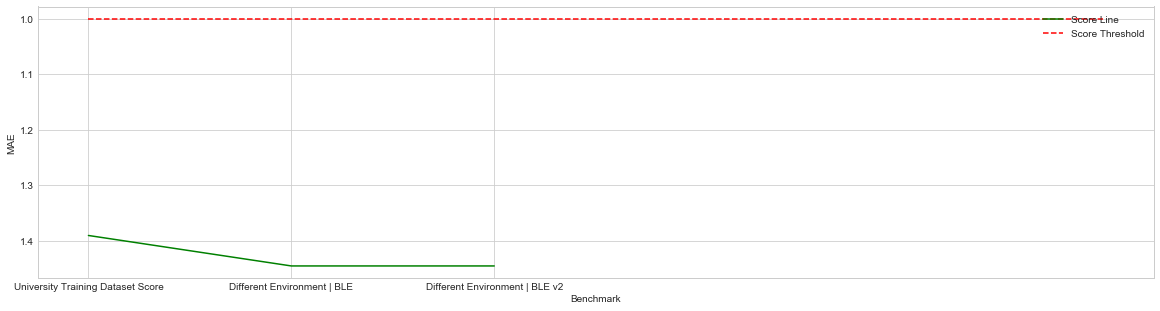

In [54]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
types = ['University Training Dataset Score','Different Environment | BLE','Different Environment | BLE v2']
results = pd.DataFrame(data=final_results,columns=statistical_cols)
display(results.sort_values(by=['mae']))
plt.figure(figsize=(20,5))
plt.plot(types,results['mae'],color='green',label='Score Line')
plt.hlines(1.0,0,5,color='red',label='Score Threshold',linestyles='dashed')
plt.xlabel('Benchmark')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.show()